In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import os 
from itertools import product
import matplotlib.pyplot as plt

In [2]:
#specify path
dir = os.getcwd()
huss_path   = os.path.join(dir,'huss.nc')
pr_path     = os.path.join(dir,'pr.nc')
rsds_path   = os.path.join(dir,'rsds.nc')
tas_path   = os.path.join(dir,'tas.nc')
sfcWind_path    = os.path.join(dir,'sfcWind.nc')
tasmax_path     = os.path.join(dir,'tasmax.nc')
tasmin_path     = os.path.join(dir,'tasmin.nc')

In [3]:
#read data
huss_data       = xr.open_dataset(huss_path)
pr_data         = xr.open_dataset(pr_path)
rsds_data       = xr.open_dataset(rsds_path)
tas_data        = xr.open_dataset(tas_path)
sfcWind_data    = xr.open_dataset(sfcWind_path)
tasmax_data     = xr.open_dataset(tasmax_path)
tasmin_data     = xr.open_dataset(tasmin_path)

In [4]:
lats = huss_data.variables['lat'][:]
lons = huss_data.variables['lon'][:]
time = huss_data.variables['time'][:]

In [5]:
#read variables:
huss    = huss_data['hurs']
pr      = pr_data['pr']
rsds    = rsds_data['rsds']
tas    = tas_data['tas']
sfcWind = sfcWind_data['sfcWind']
tasmax  = tasmax_data['tasmax']
tasmin  = tasmin_data['tasmin']

In [6]:
def get_mean_for_year(variable, year, season = None, lat = None, lon = None):
    if lat is None and lon is None:
        #huss.sel(time=huss.time.dt.year.isin([1984])).values.mean()
        data = variable.sel(time=variable.time.dt.year.isin([year]))
    else:
        #huss.sel(time=huss.time.dt.year.isin([1984]), lat = lats.values[2], lon = lons.values[3]).values.mean()
        data = variable.sel(time=variable.time.dt.year.isin([year]), 
                            lat = lat,
                            lon = lon)
    if season == 'winter':
        data = data.sel(time=data.time.dt.month.isin([10,11,12,1,2,3]))
    elif season == 'summer':
        data = data.sel(time=data.time.dt.month.isin([4,5,6,7,8,9]))
    values = data.values
    return round(values[values!= 0].mean(),2)

In [7]:
def get_sum_for_year(variable, year, season = None, lat = None, lon = None):
    if lat is None and lon is None:
        #huss.sel(time=huss.time.dt.year.isin([1984])).values.mean()
        data = variable.sel(time=variable.time.dt.year.isin([year]))
    else:
        #huss.sel(time=huss.time.dt.year.isin([1984]), lat = lats.values[2], lon = lons.values[3]).values.mean()
        data = variable.sel(time=variable.time.dt.year.isin([year]), 
                            lat = lat,
                            lon = lon)
    if season == 'winter':
        data = data.sel(time=data.time.dt.month.isin([10,11,12,1,2,3]))
    elif season == 'sommer':
        data = data.sel(time=data.time.dt.month.isin([4,5,6,7,8,9]))
    values = data.values
    return round(values[values!= 0].sum(),2)

In [8]:
def get_time(time):
    datetime = np.datetime_as_string(time, timezone='UTC')
    year = datetime[:4]
    month = datetime[5:7]
    day = datetime[8:10]
    return (year, month, day)

In [9]:
def kelvinToCelsius(kelvin):
    return "%.2f"%(kelvin - 273.15)

In [10]:
#this function takes input as variable (xarray), time, lat and lon
#and returns the filtered value
def get_value(variable, time, lat, lon):
    return round(variable.sel(time = time, lat = lat, lon = lon ).values.item(0),1)

In [11]:
def get_formated_data(rsds, tas, tasmax, tasmin, pr,
                      huss, sfcWind, year, month=None,
                      day=None, lat=None, lon=None):
    if month is None and day is None:
        if lat is None and lon is None: #only year 
            fields = ((year, 8), (rsds, 8), (tas, 8), 
              (tasmax, 8),(tasmin, 8), (pr, 8), (huss, 8), (sfcWind, 8))
        else: #year and cord
            fields = ((year, 8), (lat, 8),(lon, 8), (rsds, 8), (tas, 8), 
              (tasmax, 8),(tasmin, 8), (pr, 8), (huss, 8), (sfcWind, 8))
    else: # year, month, day
        if lat is None and lon is None: #year, month, day no cord
            fields = ((year, 8), (month, 8), (day, 8), (rsds, 8), (tas, 8), 
              (tasmax, 8),(tasmin, 8), (pr, 8), (huss, 8), (sfcWind, 8))
        else: #year and cord
            fields = ((year, 8),(month, 8), (day, 8), (lat, 8),(lon, 8),(rsds, 8), 
                      (tas, 8),(tasmax, 8),(tasmin, 8), (pr, 8), (huss, 8), (sfcWind, 8))
    return ''.join([str(var).rjust(width) 
                        for var, width in fields])

In [33]:
def make_dataframe(output_name, years, write = False, season=None, lat=None, lon=None):
    data = []
    if write is True:
        output = os.path.join(dir,output_name + '.txt')
        open(output, 'w').close()
    for year in years:
        huss_i      = get_mean_for_year(huss, season = season, year = year, lat = lat, lon = lon)
        pr_i        = get_sum_for_year(pr,  season = season, year = year, lat = lat, lon = lon)
        tas_i      = get_mean_for_year(tas, season = season, year = year, lat = lat, lon = lon)
        rsds_i     = get_mean_for_year(rsds, season = season, year = year, lat = lat, lon = lon)
        sfcWind_i   = get_mean_for_year(sfcWind, season = season, year = year, lat = lat, lon = lon)
        tasmax_i   = get_mean_for_year(tasmax, season = season, year = year, lat = lat, lon = lon)
        tasmin_i   = get_mean_for_year(tasmin, season = season, year = year, lat = lat, lon = lon)
        #Convert kelvin to celcius
        tas_i = kelvinToCelsius(tas_i)
        tasmax_i = kelvinToCelsius(tasmax_i)
        tasmin_i = kelvinToCelsius(tasmin_i)
    #     print("huss_i", huss_i)
    #     print("pr_i",pr_i)
    #     print("tas_i",tas_i)
    #     print("rsds_i",rsds_i)
    #     print("sfcWind_i",sfcWind_i)
    #     print("tasmax_i",tasmax_i)
    #     print("tasmin_i",tasmin_i)
        data_point = [year,huss_i, pr_i, rsds_i, sfcWind_i, tas_i, tasmax_i, tasmin_i]
        data.append(data_point)
        if write is True:
            info = get_formated_data(rsds_i, tas_i, tasmax_i, tasmin_i, pr_i, huss_i, sfcWind_i, year)
            #write new data
            with open(output, 'a') as f:
                f.truncate()
                f.write(info + "\n")
    return pd.DataFrame(data,columns=['year','huss','pr','rsds','sfcWind', 'tas', 'tasmax', 'tasmin'])

In [13]:
def create_plot(dataframe, title, ylable, start_year, end_year, variable1, w=16,h=12,
                interval= None, variable2=None, variable3 = None):
    var1 = dataframe[(dataframe.year >= start_year) \
                         & (dataframe.year <= end_year)][variable1].astype(float)        
    year = dataframe[(dataframe.year >= start_year) \
                         & (dataframe.year <= end_year)].year
    figure = plt.figure(figsize=(w,h))
    graph = figure.add_subplot(111)
    graph.plot(year, var1, ls="solid", marker = ".", label= variable1)
    if variable2 is not None:
        var2 = dataframe[(dataframe.year >= start_year) \
                             & (dataframe.year <= end_year)][variable2].astype(float)
        graph.plot(year, var2, ls="solid", marker = ".", label= variable2)
    if variable3 is not None:
        var3 = dataframe[(dataframe.year >= start_year) \
                             & (dataframe.year <= end_year)][variable3].astype(float)
        graph.plot(year, var3, ls="solid", marker = ".", label= variable3) 
    if interval is not None and variable2 is not None:
        min_y = round(min(var1.min(),var2.min()))
        max_y = max(var1.max(),var2.max())
        graph.set_yticks(np.arange(min_y,max_y,interval))
    elif interval is not None:
        graph.set_yticks(np.arange(round(var1.min()),var1.max(),interval))
    graph.set_xlabel("year")
    graph.set_ylabel(ylable)
    graph.set_title(title)
    graph.legend()
    graph.grid("true")
    return graph

In [14]:
def create_and_save_plot(path, dataframe, title, ylable, start_year, end_year, variable1, w=16,h=12,
                interval= None, variable2=None, variable3 = None):
    graph = create_plot(dataframe, title, ylable, start_year, end_year, variable1, w=w,h=h,
                interval= interval, variable2=variable2, variable3 = variable3)
    plot_path = os.path.join(path,"{}.png".format(title))
    graph.figure.savefig(plot_path)

In [15]:
points = [['WM', 81.75, 29.75],
          ['WH', 81.25, 29.25],
          ['WT', 80.75, 28.75],
          ['EM', 87.25, 27.25],
          ['EH', 87.25, 26.75],
          ['ET', 87.75, 26.75],
          ['MM', 84.75, 28.25],
          ['MH', 83.75, 27.75],
          ['MT', 83.25, 27.25]]

C:\Users\student\AppData\Local\Temp\ipykernel_904\2049837358.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize=(w,h))


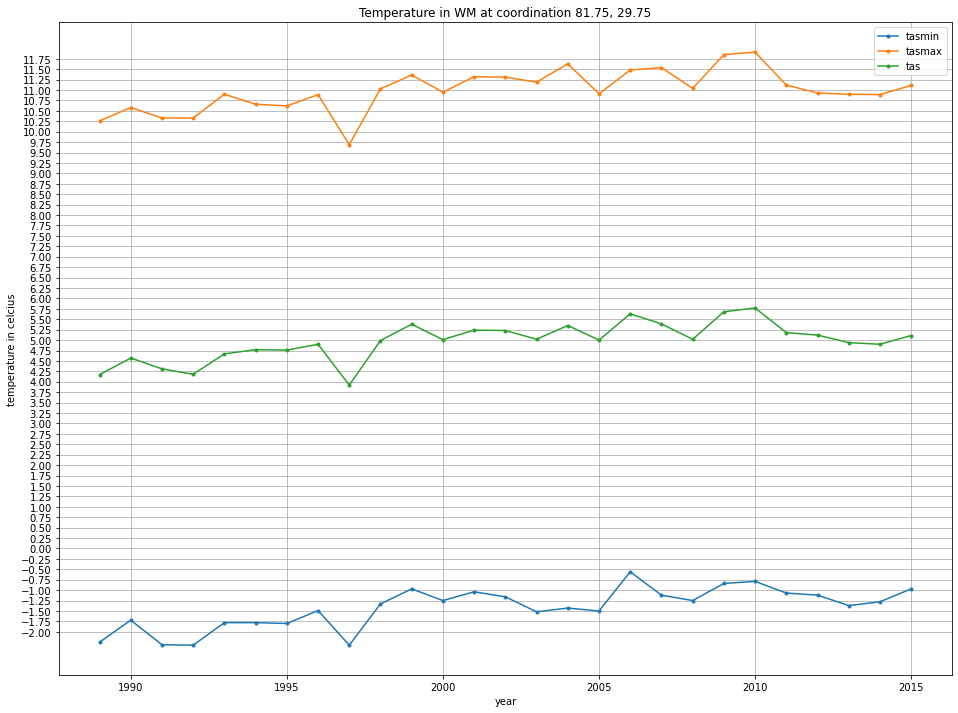

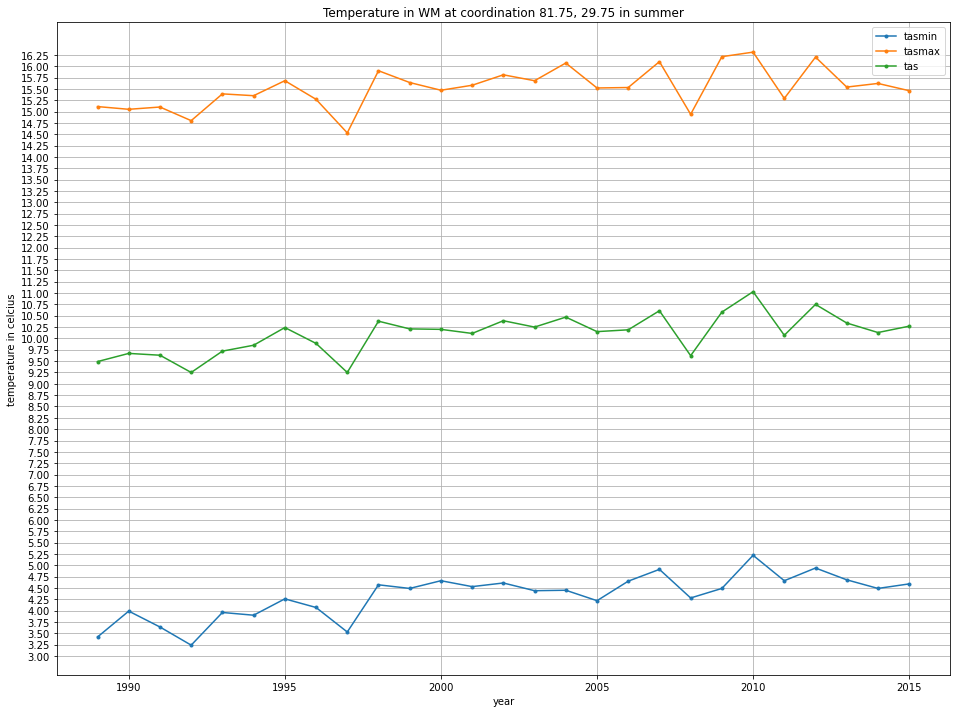

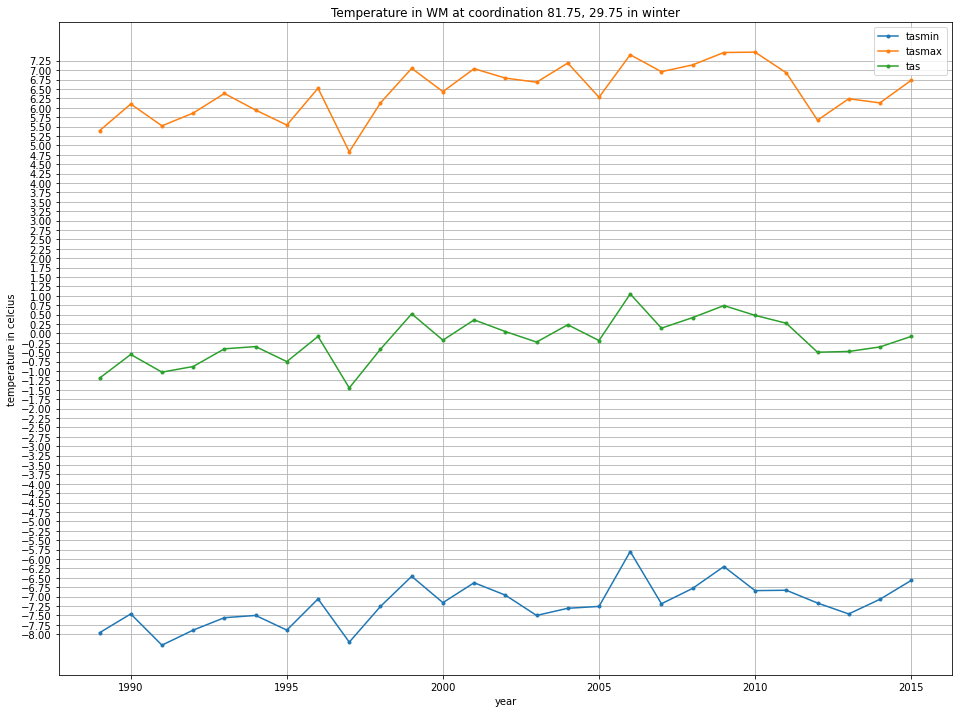

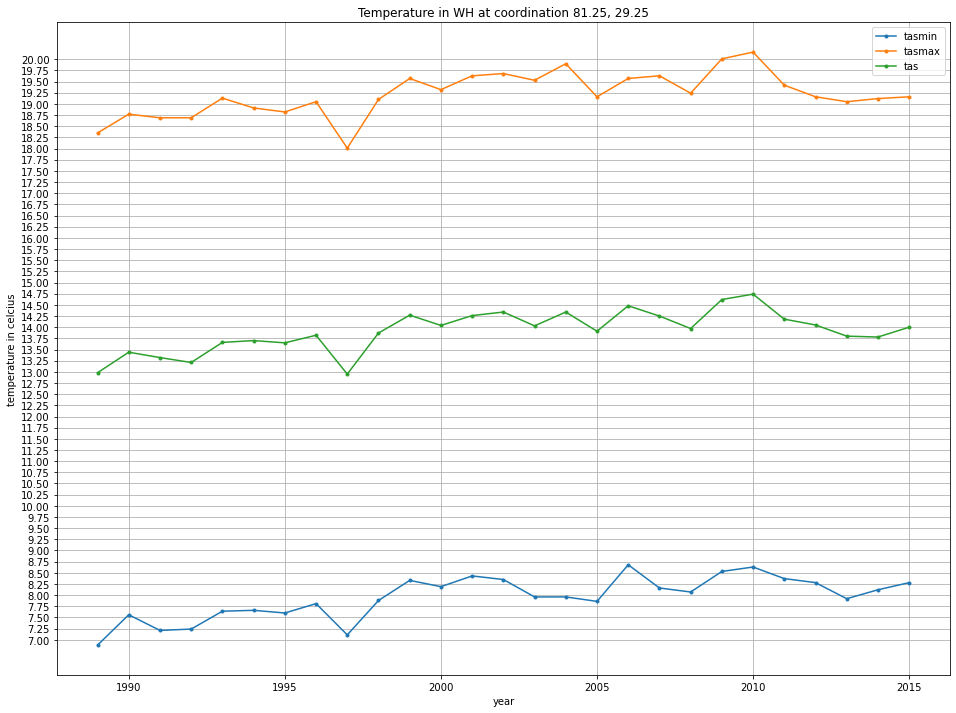

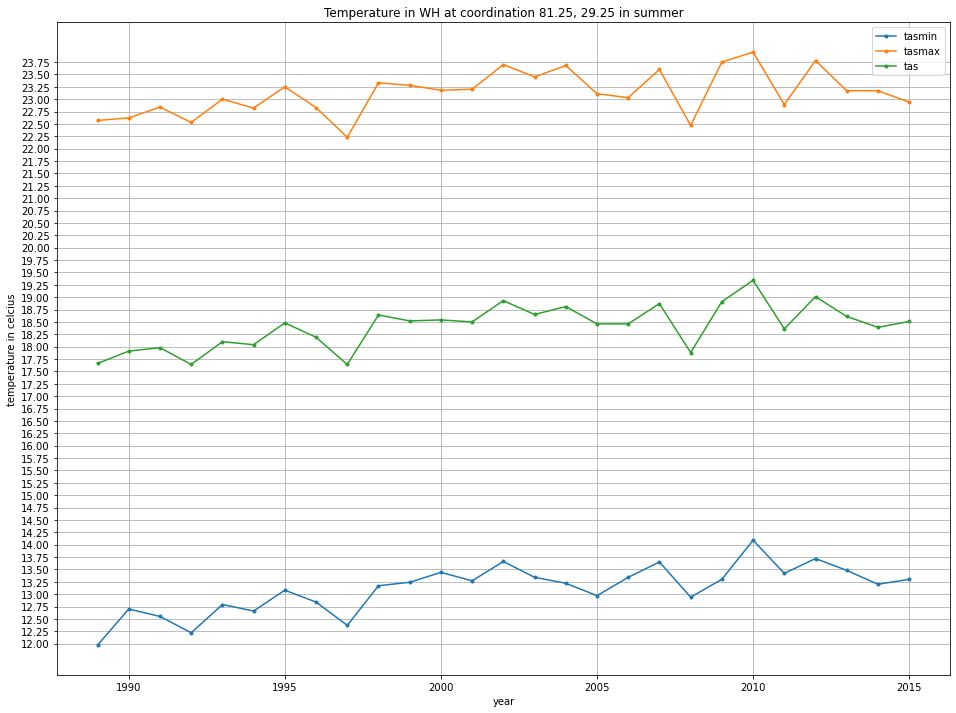

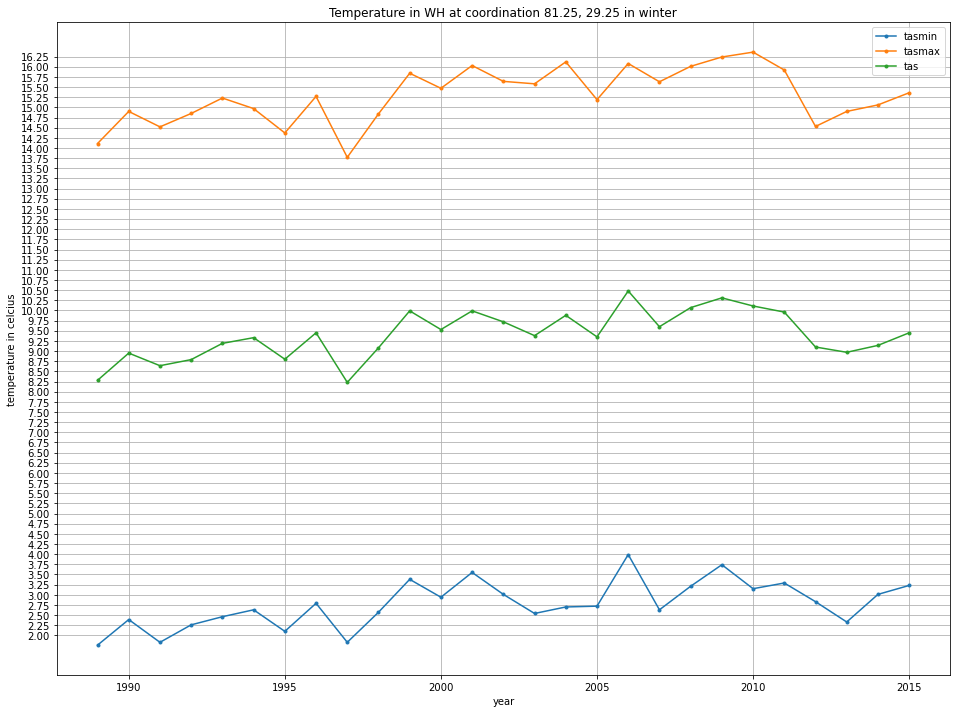

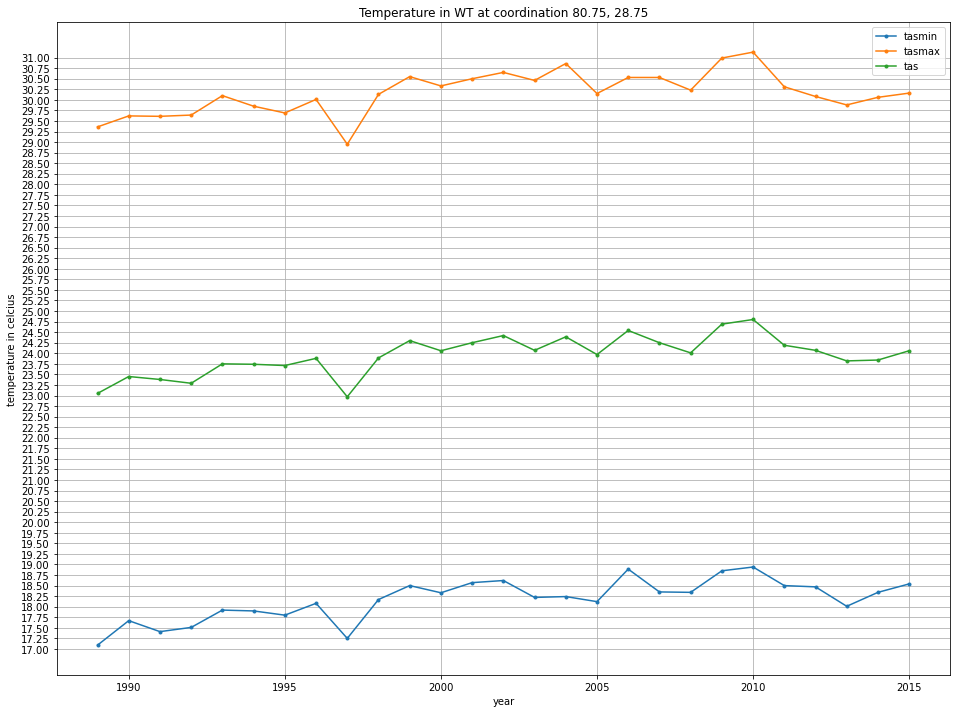

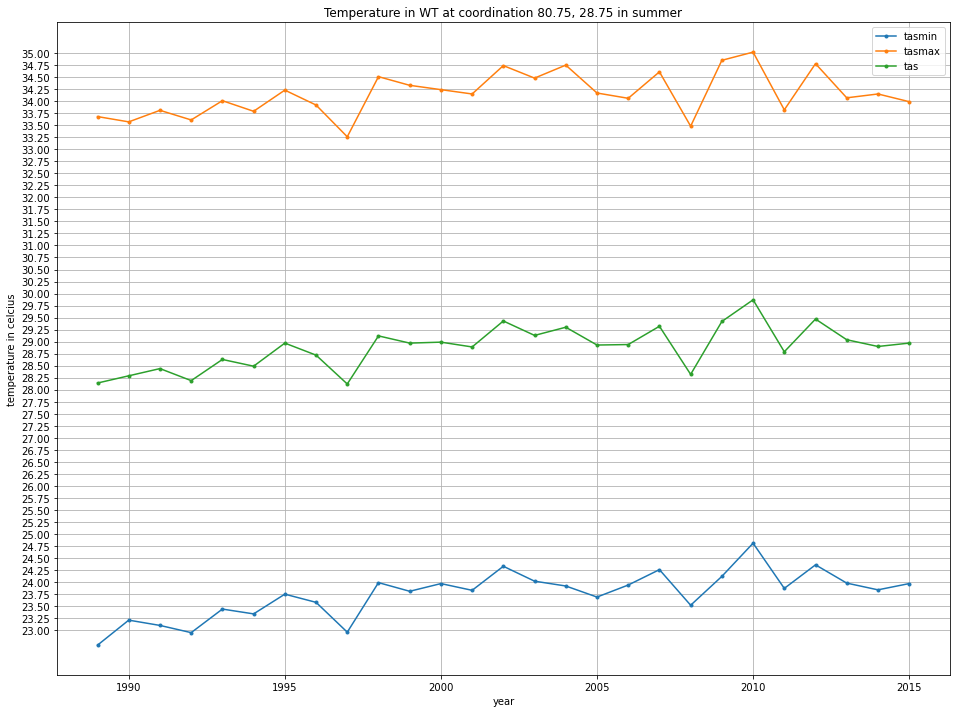

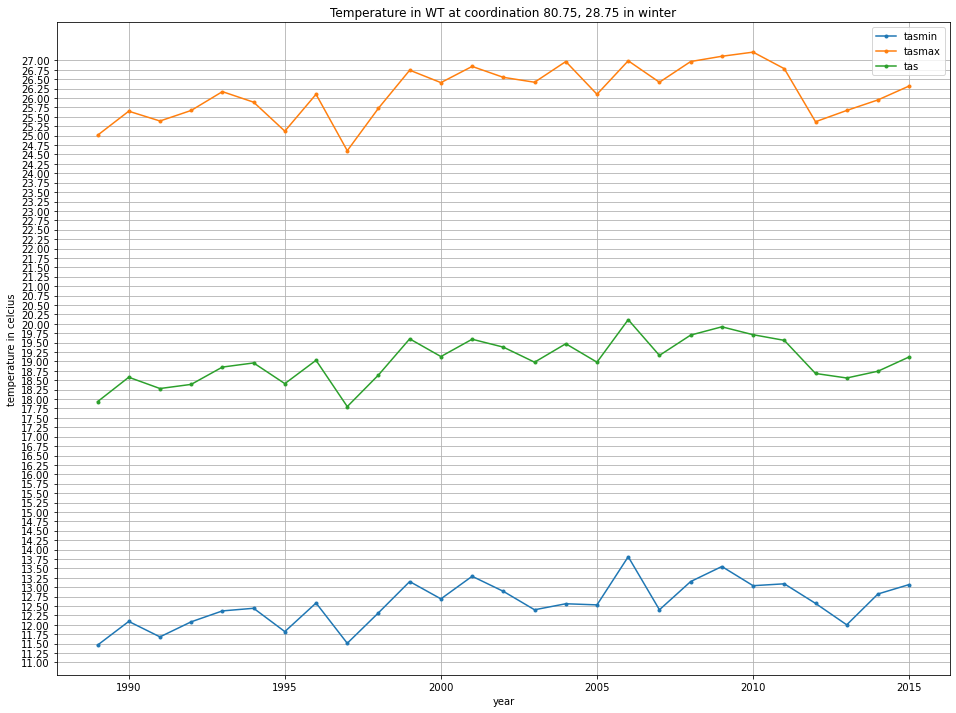

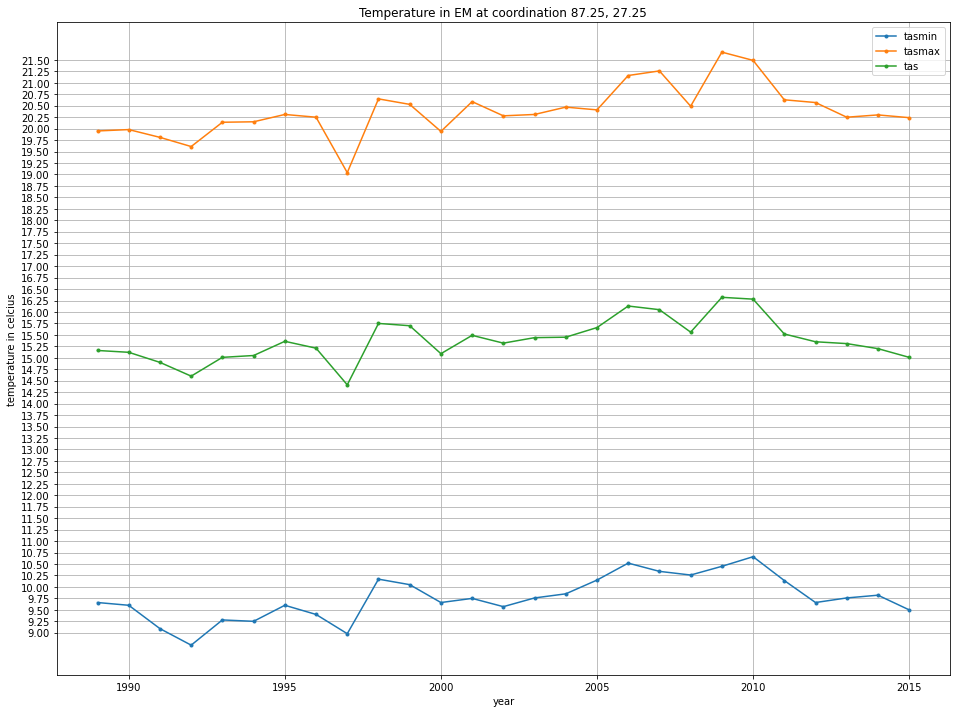

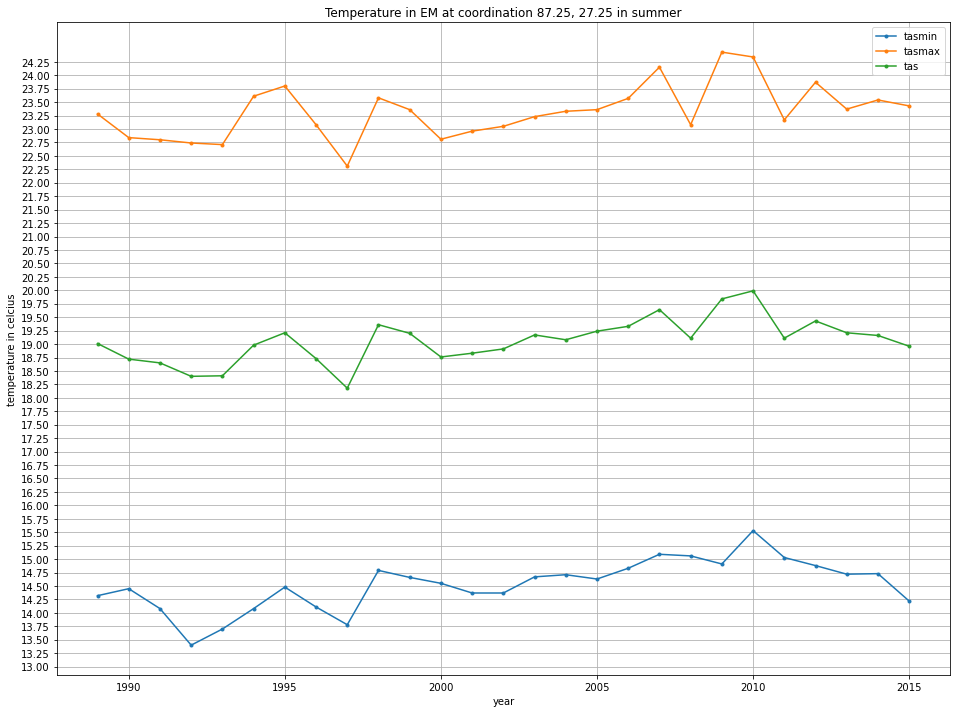

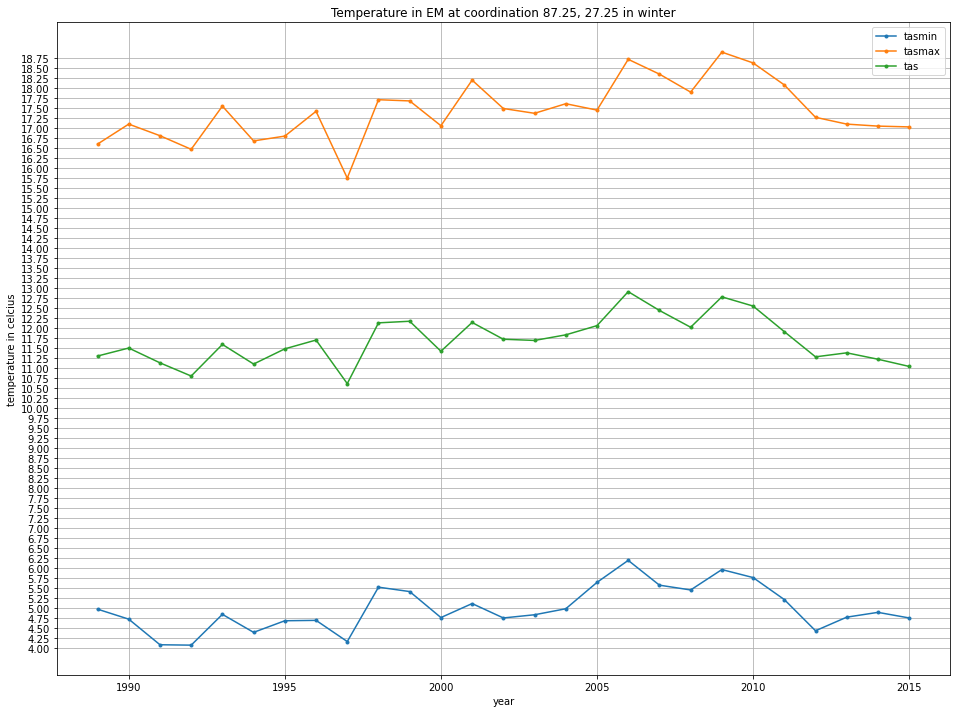

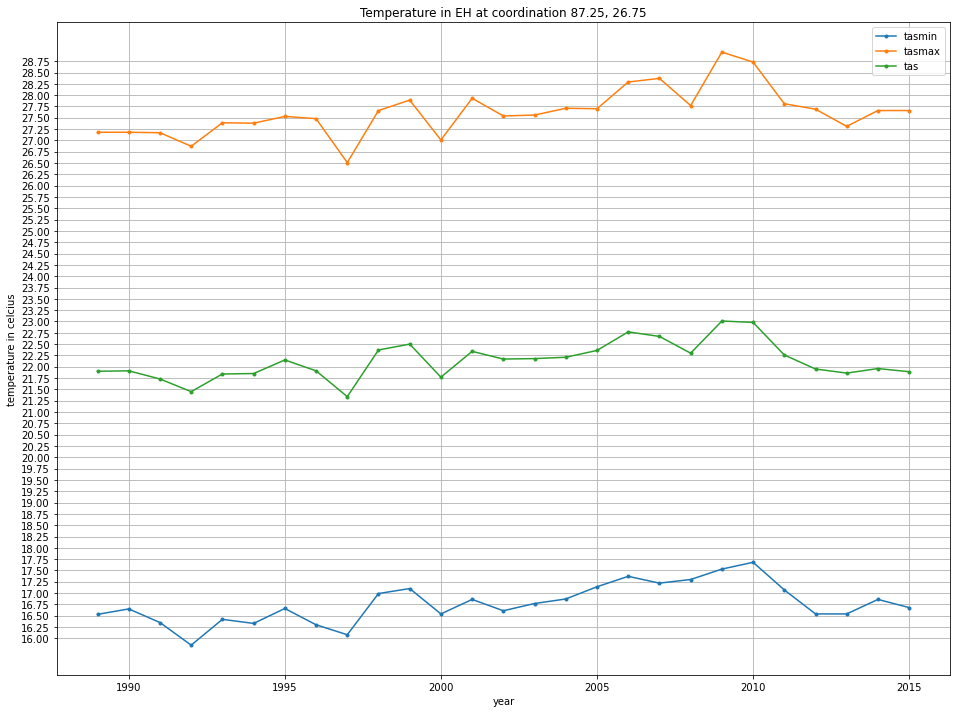

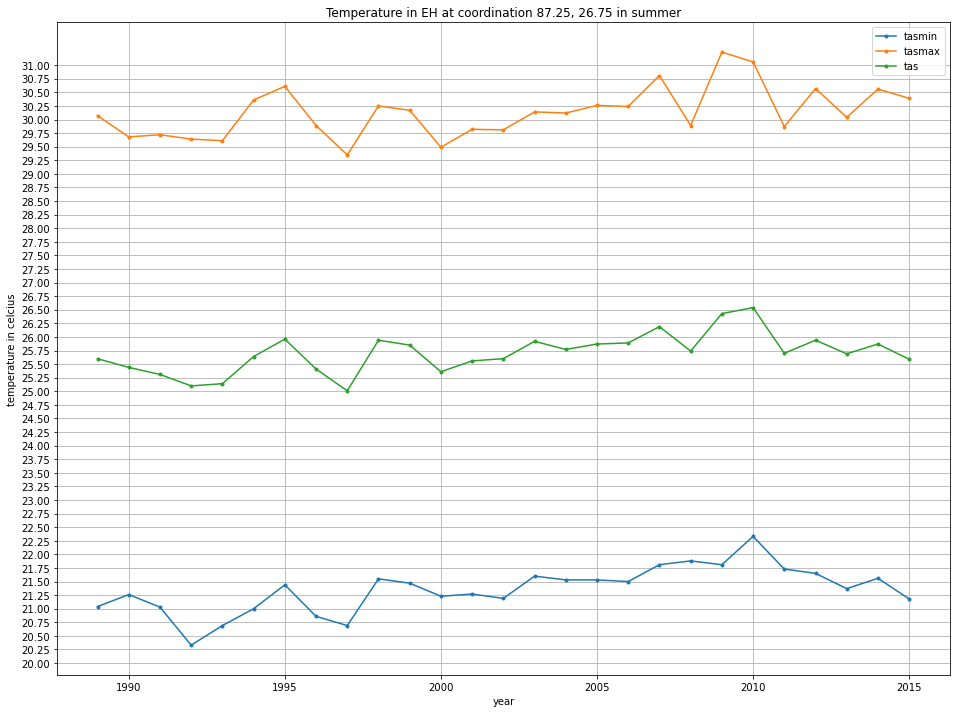

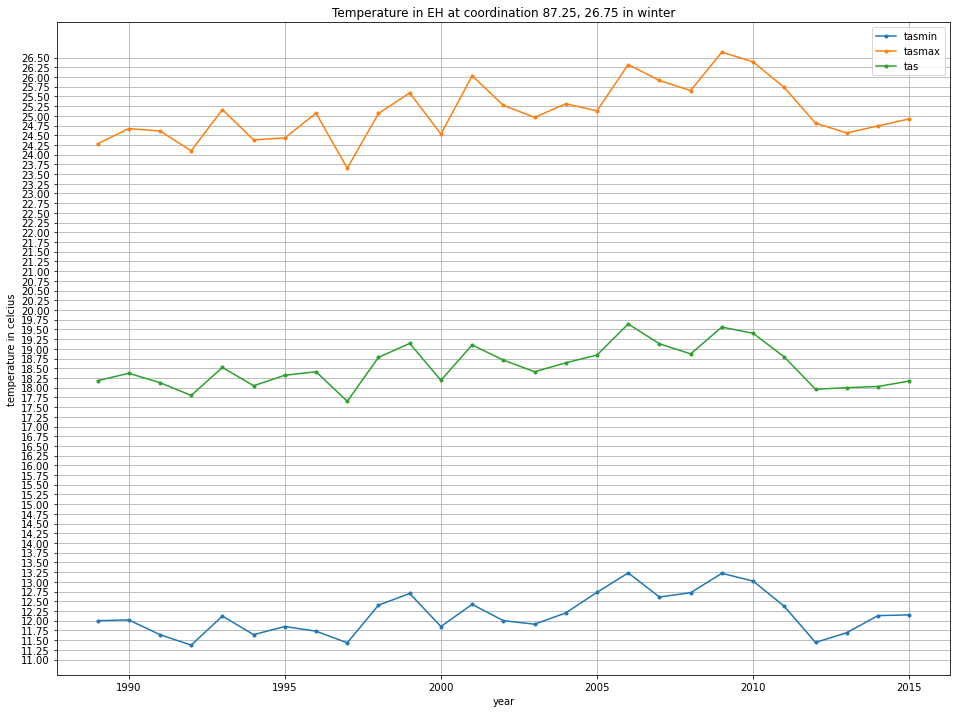

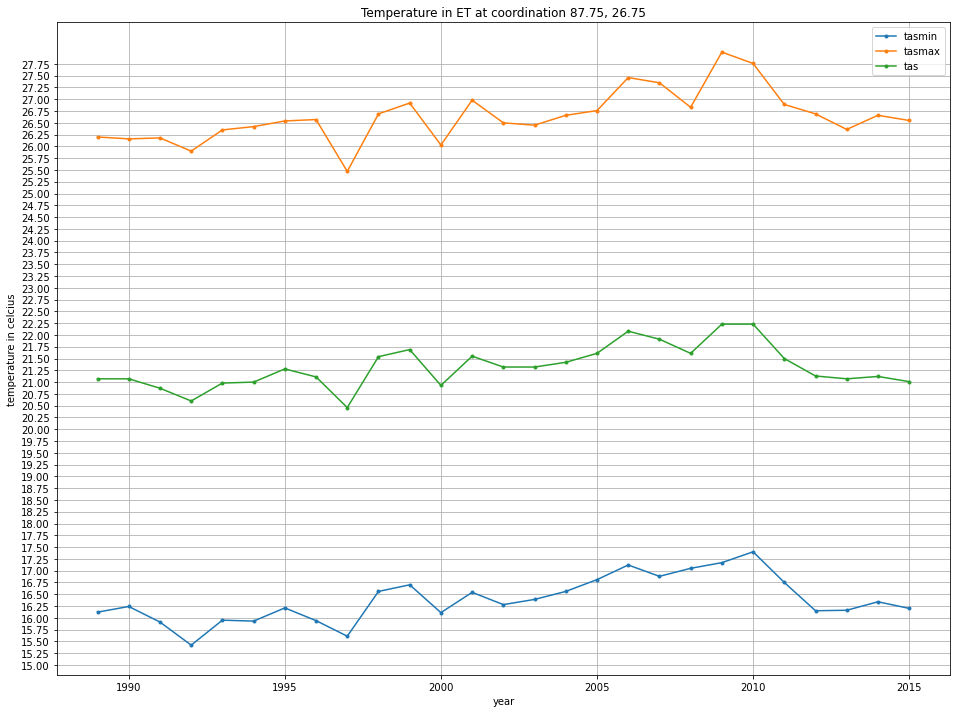

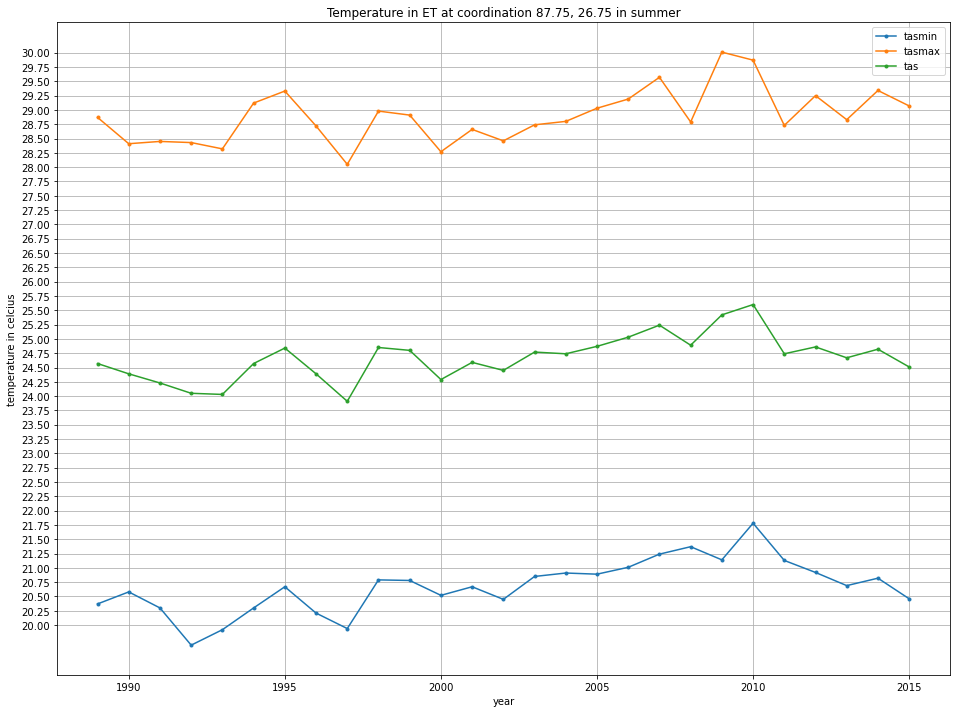

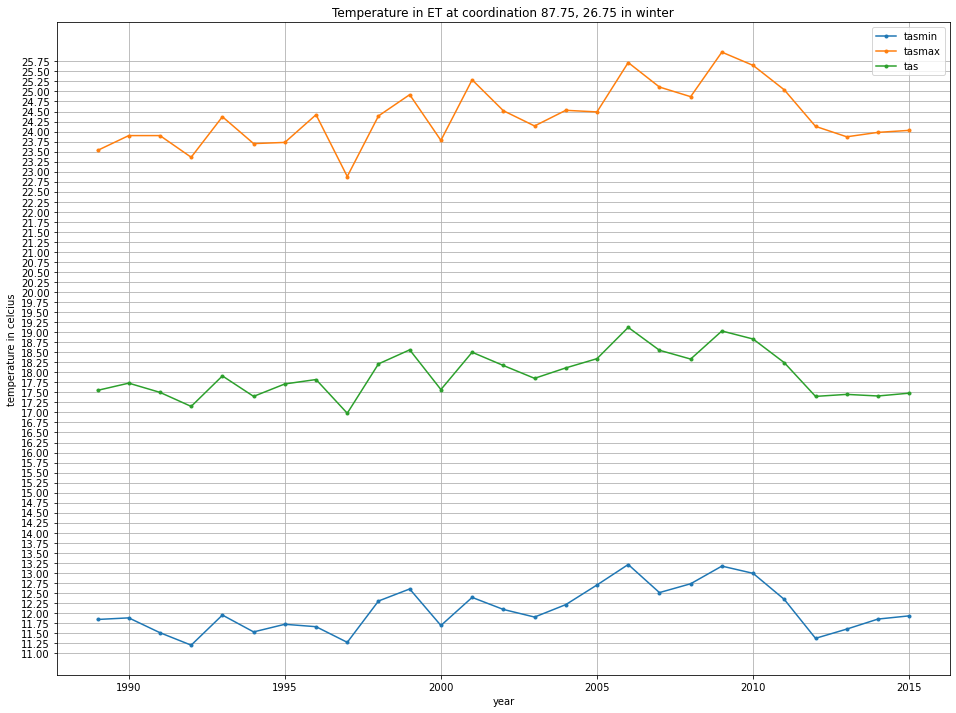

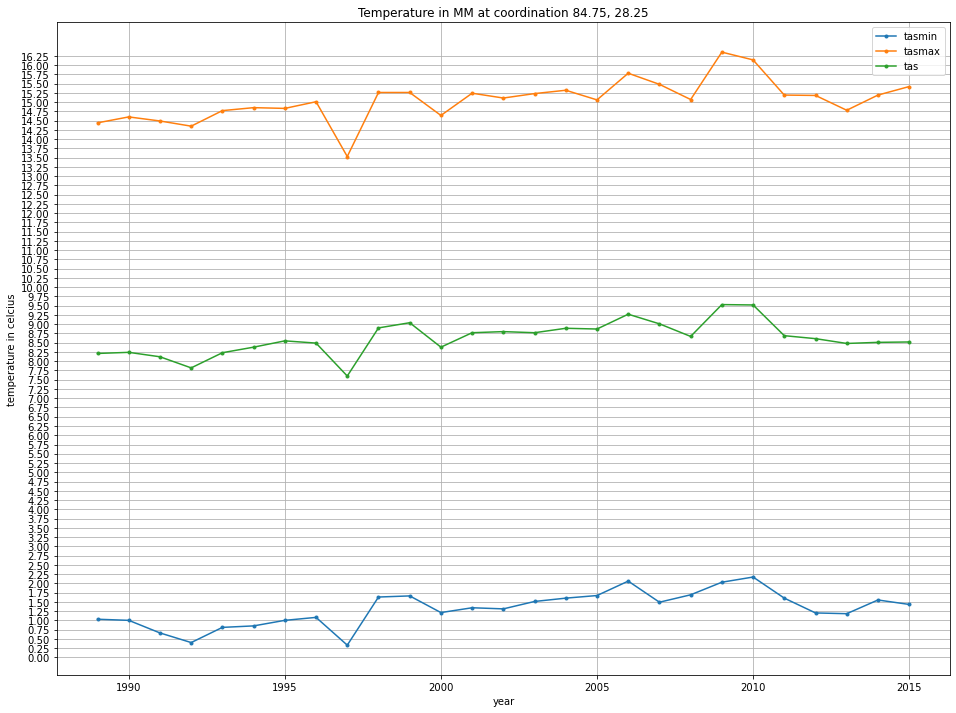

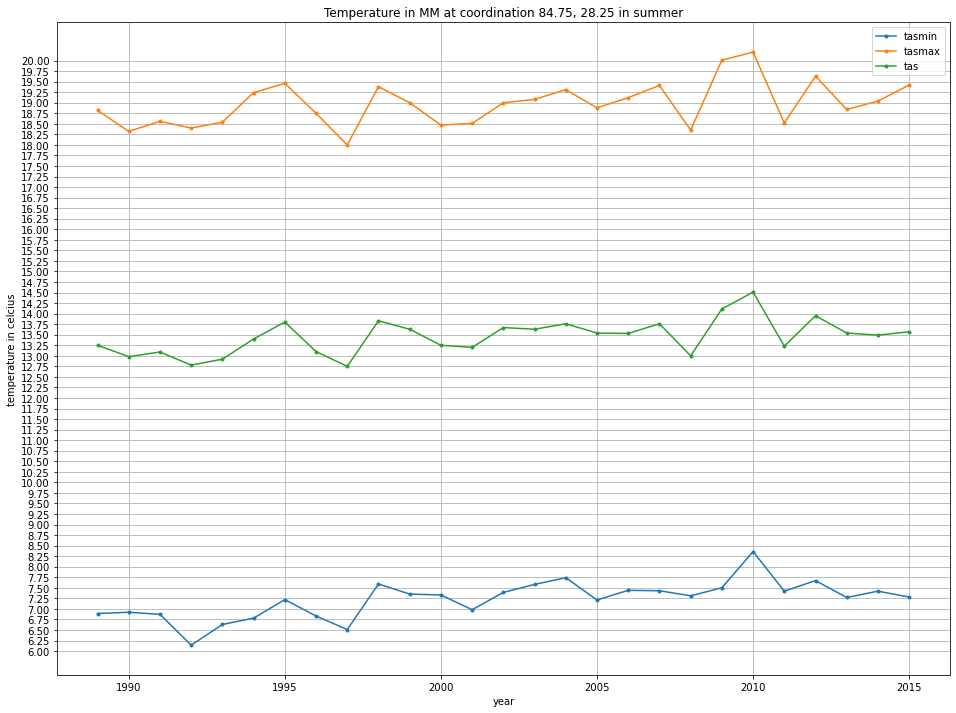

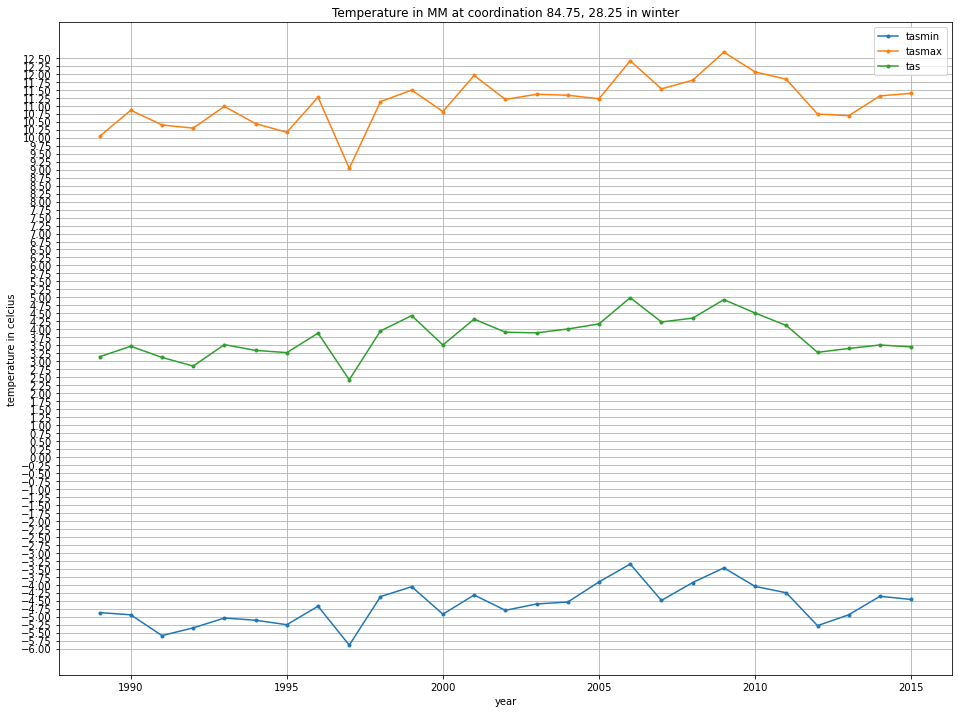

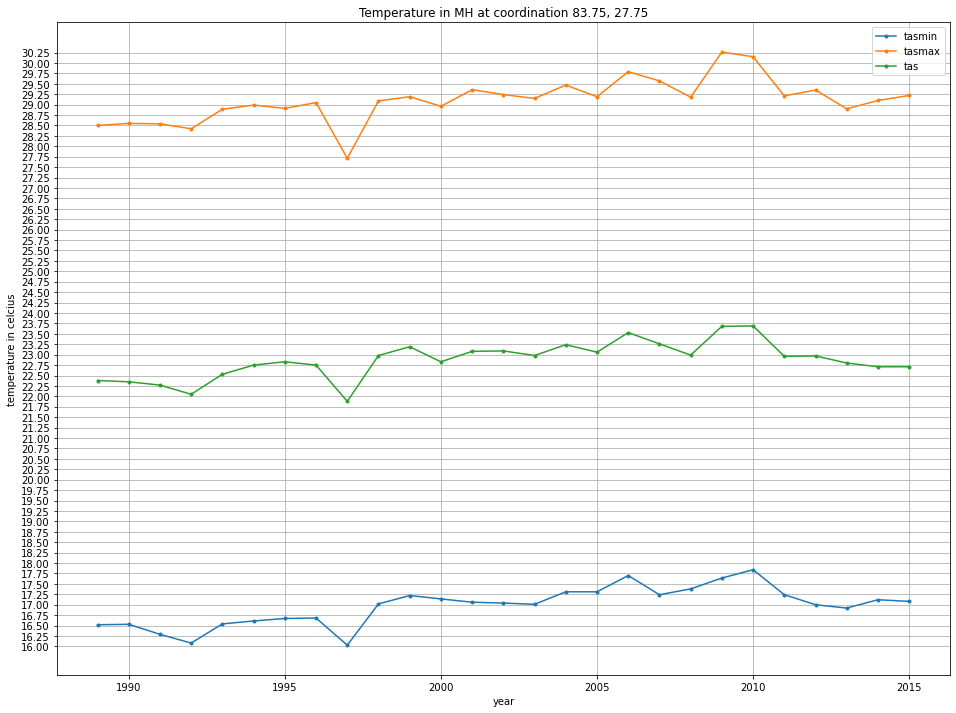

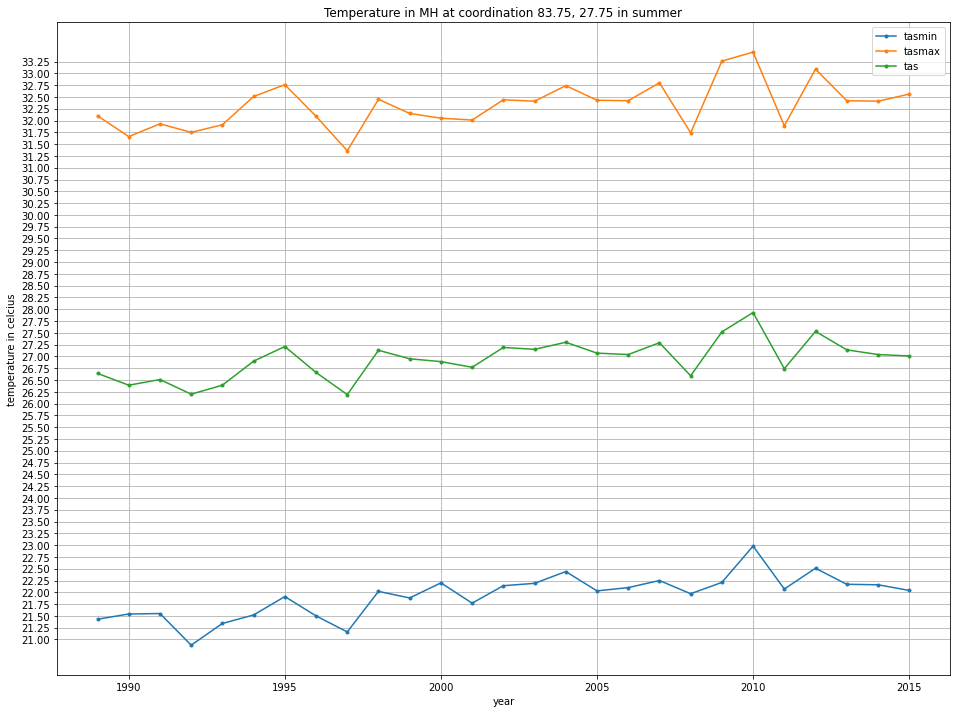

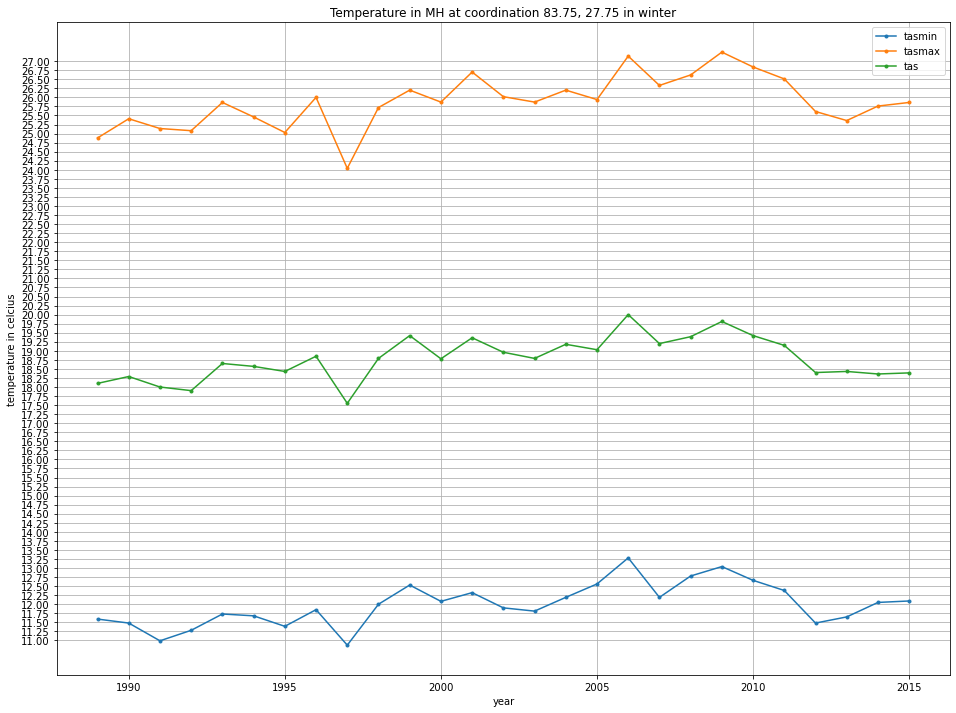

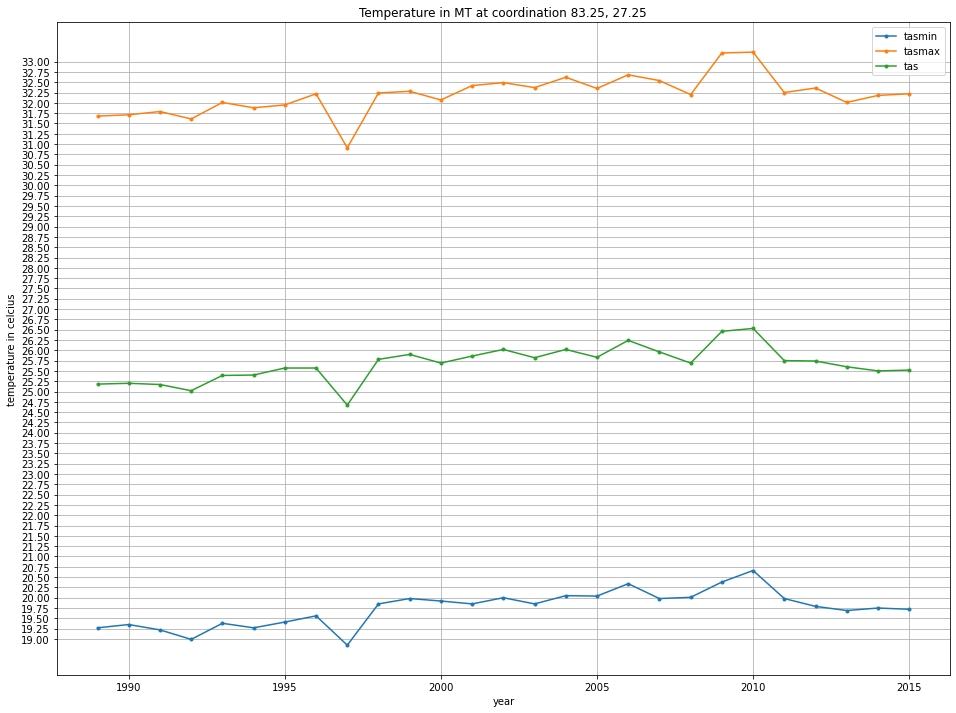

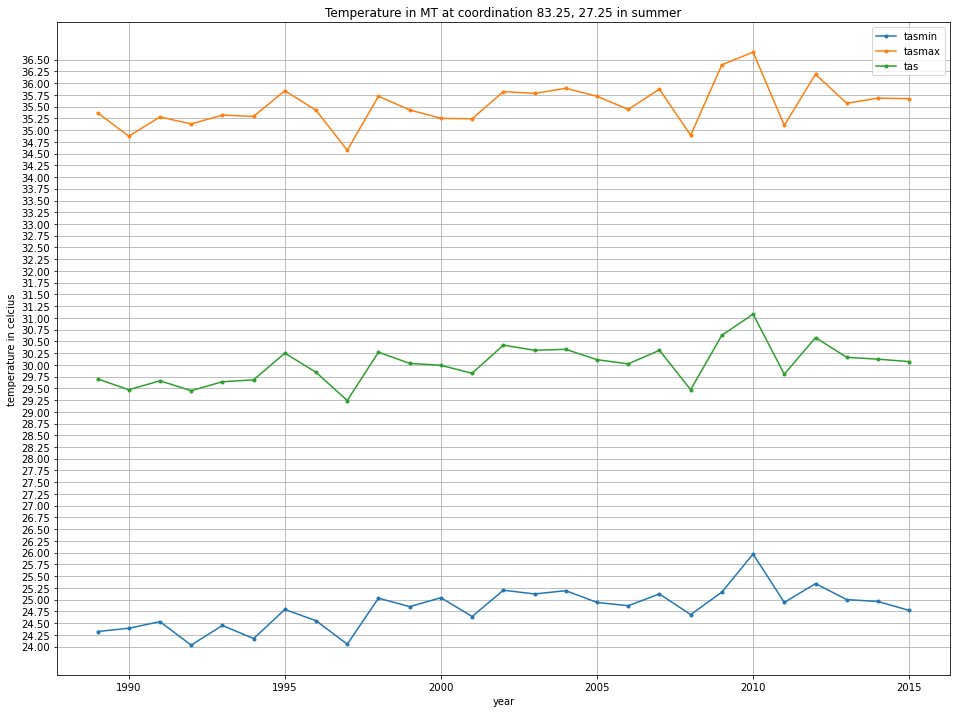

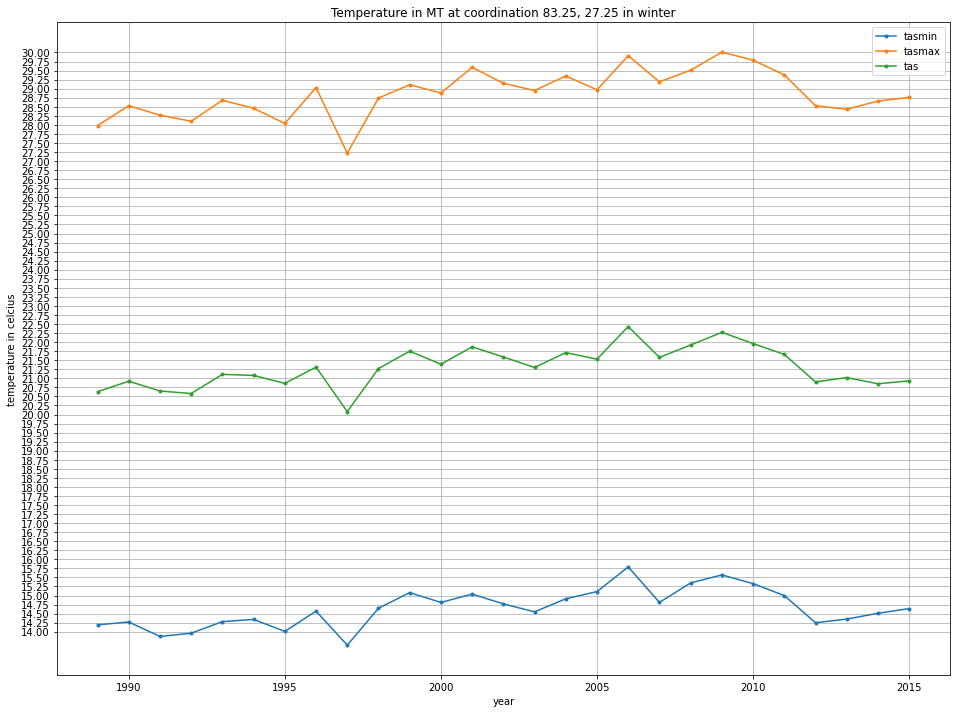

In [34]:
for point in points:
    df = make_dataframe(point[0] + '_allyear', list(range(1989,2016)), write = False, lon=point[1], lat=point[2])
    df_summer = make_dataframe(point[0] + '_summer', list(range(1989,2016)), write = False, season = "summer", lon=point[1], lat=point[2])
    df_winter = make_dataframe(point[0] + '_winter', list(range(1989,2016)), write = False, season = "winter", lon=point[1], lat=point[2])
    create_and_save_plot(dir, df, "Temperature in {} at coordination {}, {}".format(point[0],point[1], point[2]),
                         "temperature in celcius", 1989, 2016, interval=0.25, variable1='tasmin', variable2='tasmax', variable3='tas')
    create_and_save_plot(dir, df_summer, "Temperature in {} at coordination {}, {} in summer".format(point[0],point[1], point[2]),
                         "temperature in celcius", 1989, 2016, interval=0.25, variable1='tasmin', variable2='tasmax', variable3='tas')
    create_and_save_plot(dir, df_winter, "Temperature in {} at coordination {}, {} in winter".format(point[0],point[1], point[2]),
                         "temperature in celcius", 1989, 2016, interval=0.25, variable1='tasmin', variable2='tasmax', variable3='tas')

In [27]:
winter = make_dataframe("winter", list(range(1989,2016)), write =False, season = "winter")
winter

,year,huss,pr,rsds,sfcWind,tas,tasmax,tasmin
0,1989,58.650002,0.22,209.229996,1.85,6.03,13.40,-1.23
1,1990,59.080002,0.29,201.660004,1.84,6.45,14.09,-1.01
2,1991,58.630001,0.21,205.979996,1.83,6.06,13.75,-1.56
3,1992,59.970001,0.21,203.020004,1.86,5.99,13.62,-1.43
4,1993,59.020000,0.19,202.559998,1.86,6.64,14.43,-0.94
5,1994,59.639999,0.16,207.000000,1.84,6.44,13.88,-1.10
6,1995,63.369999,0.29,203.990005,1.79,6.29,13.52,-1.35
7,1996,63.590000,0.32,203.309998,1.83,6.84,14.48,-0.77
8,1997,62.910000,0.32,202.479996,1.81,5.53,12.68,-1.78
9,1998,63.040001,0.27,202.070007,1.76,6.80,14.31,-0.61


In [28]:
summer = make_dataframe("summer", list(range(1989,2016)), write =False, season = "summer")
all_year = make_dataframe("allyear", list(range(1989,2016)), write =False)

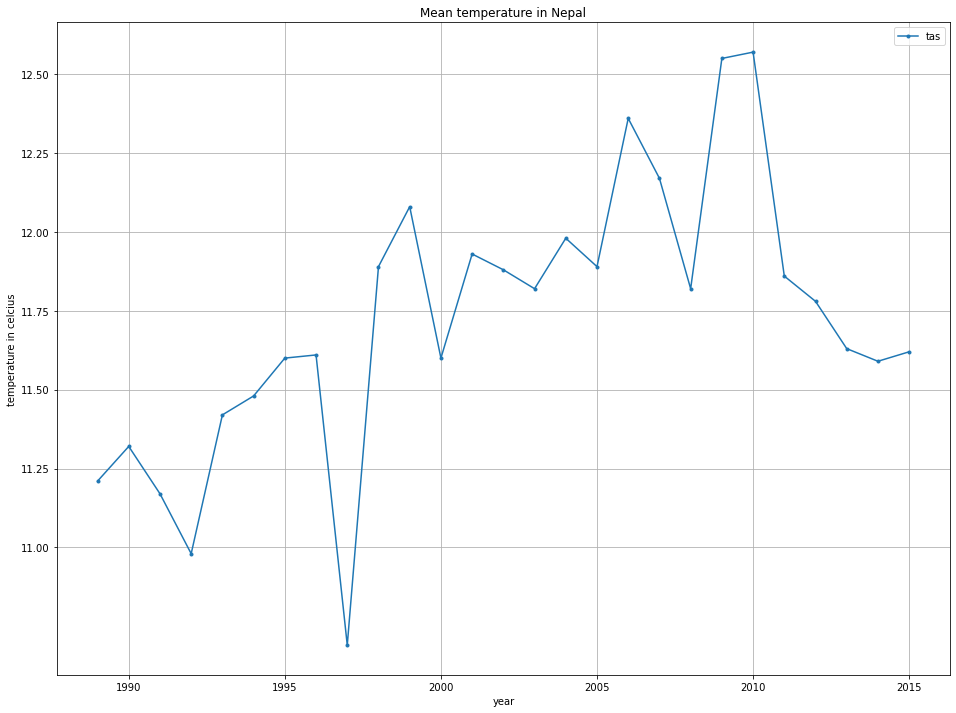

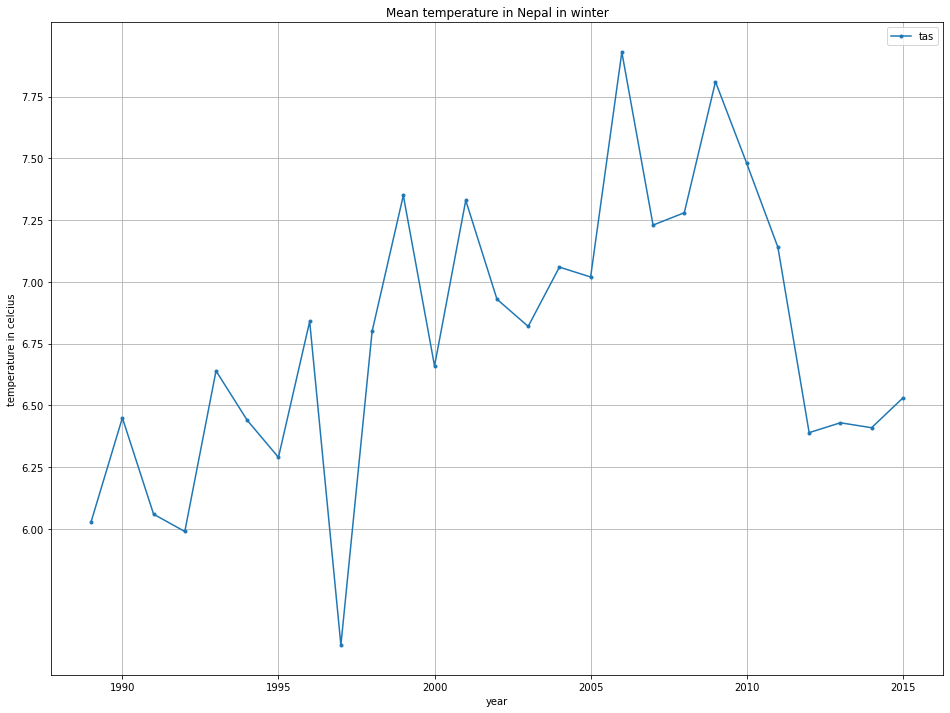

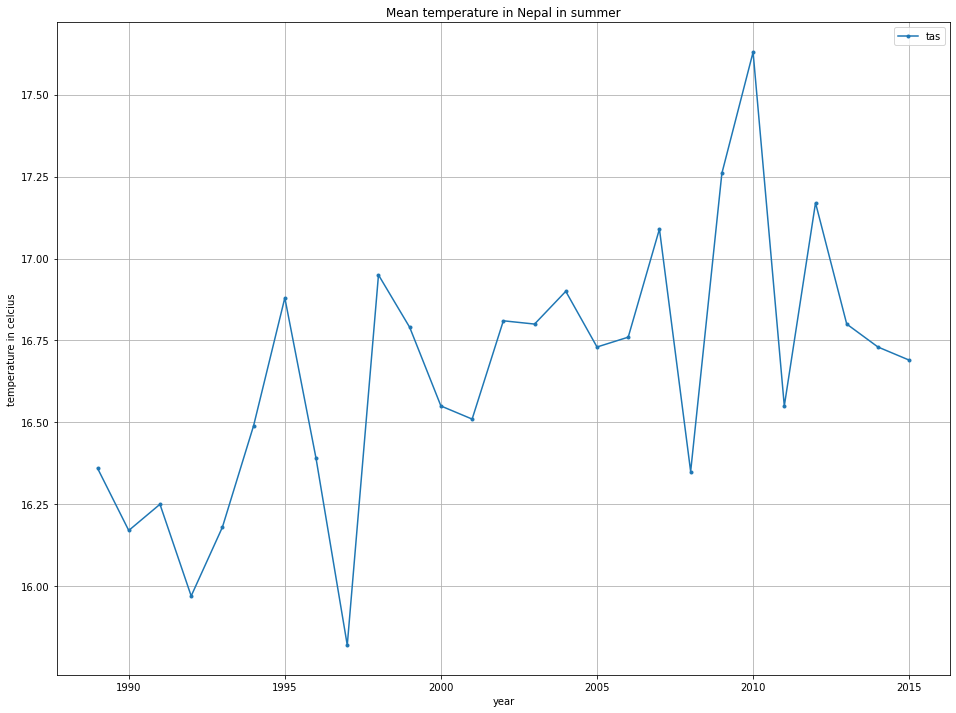

In [120]:
create_and_save_plot(dir,all_year,"Mean temperature in Nepal", "temperature in celcius", 1989, 2016, interval=0.25,variable1='tas')
create_and_save_plot(dir,winter,"Mean temperature in Nepal in winter", "temperature in celcius", 1989, 2016, interval=0.25,variable1='tas')
create_and_save_plot(dir,summer,"Mean temperature in Nepal in summer", "temperature in celcius", 1989, 2016, interval=0.25,variable1='tas')

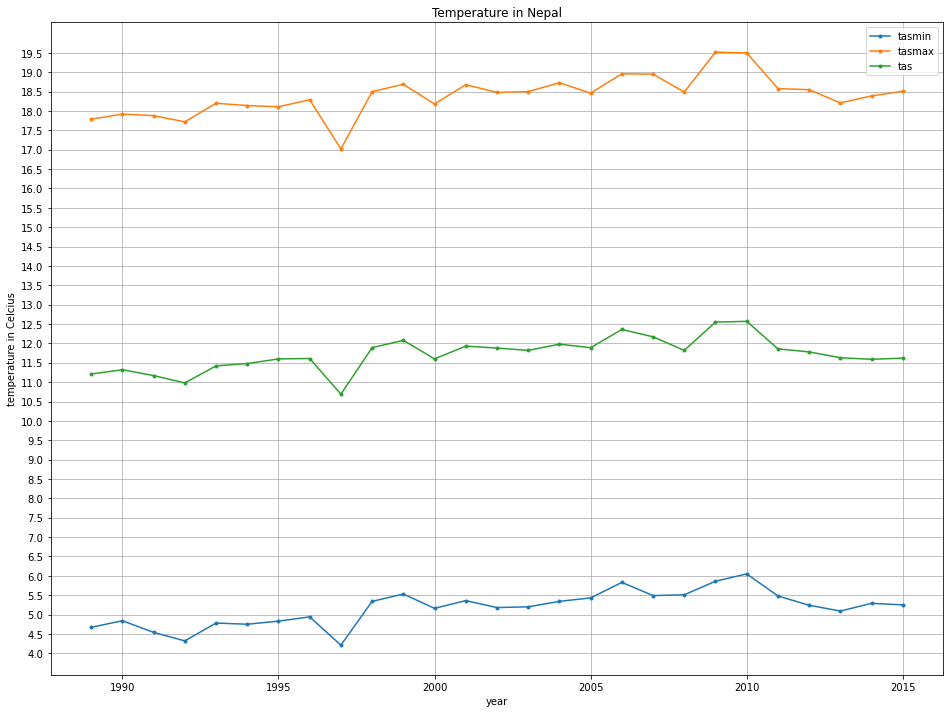

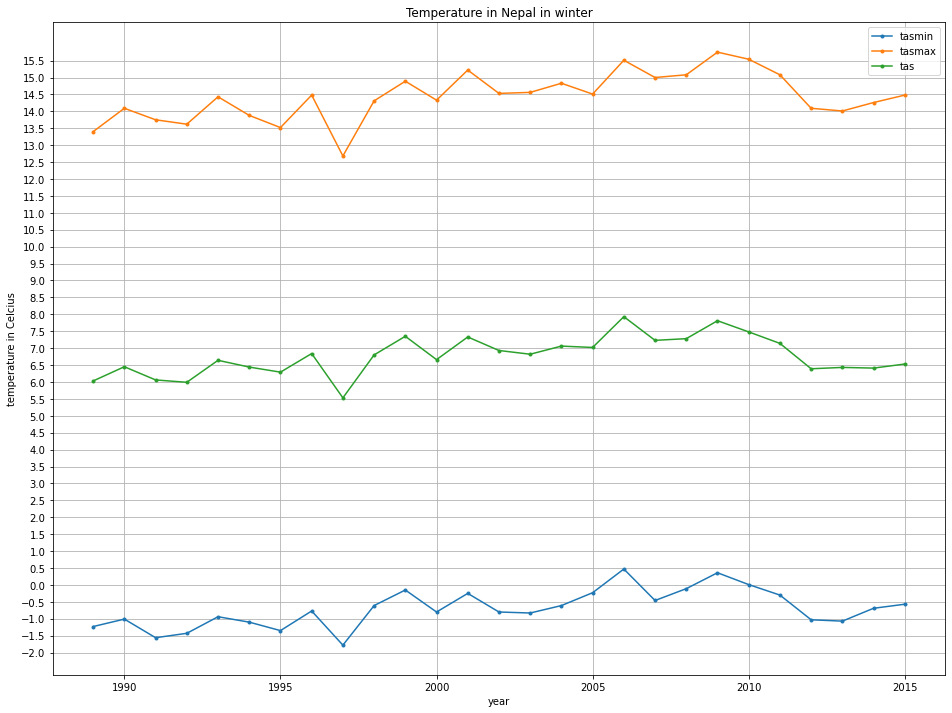

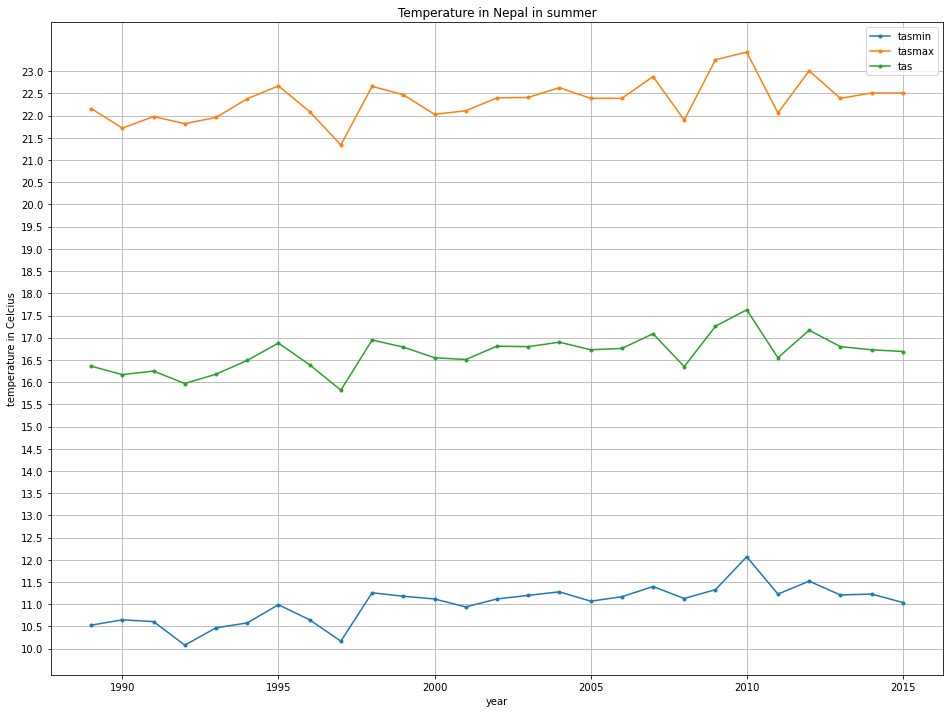

In [122]:
create_and_save_plot(dir, all_year,"Temperature in Nepal", "temperature in Celcius", 1989, 2016, interval=0.5, variable1='tasmin', variable2='tasmax', variable3='tas')
create_and_save_plot(dir, winter,"Temperature in Nepal in winter", "temperature in Celcius", 1989, 2016, interval=0.5, variable1='tasmin', variable2='tasmax', variable3='tas')
create_and_save_plot(dir, summer,"Temperature in Nepal in summer", "temperature in Celcius", 1989, 2016, interval=0.5, variable1='tasmin', variable2='tasmax', variable3='tas')

In [92]:
# all_year[all_year.year >= 2000]['tas']
var1 = all_year[(all_year.year >= 2000) \
                         & (all_year.year <= 2001)]['tas'].astype(float)
var1.min()

11.6